# Video Game Sales Data Analysis

## Reading 'vgsales.csv' file
The 'Video Game Sales' dataset is read into a dataframe from a GitHub repository (using a URL)

The first 5 rows are shown to indiciate the dataset has been successfully read:

In [24]:
import pandas as pd
url = 'https://raw.githubusercontent.com/DanielPitfield/Python_Data_Science/master/vgsales.csv'
sales = pd.read_csv(url) # Read data
sales.head() # Return first 5 rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Missing values
The number of missing values for each column in the dataset is next identified:

In [25]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

The 'Year' value for 271 games is missing

The 'Publisher' value for 58 games is missing

## Distribution of Global Sales variable (Histogram)

Text(0, 0.5, 'Frequency')

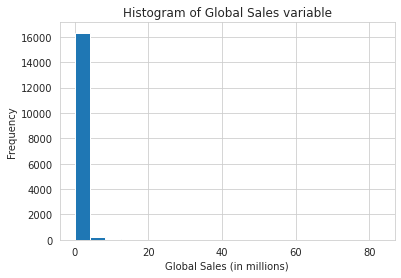

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(sales['Global_Sales'],bins=20)
plt.title('Histogram of Global Sales variable')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')

## Distribution of Global Sales variable (Boxplot)

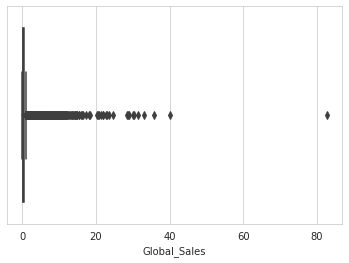

In [27]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(x='Global_Sales', data=sales, width=0.8)

## Platform - Global Sales

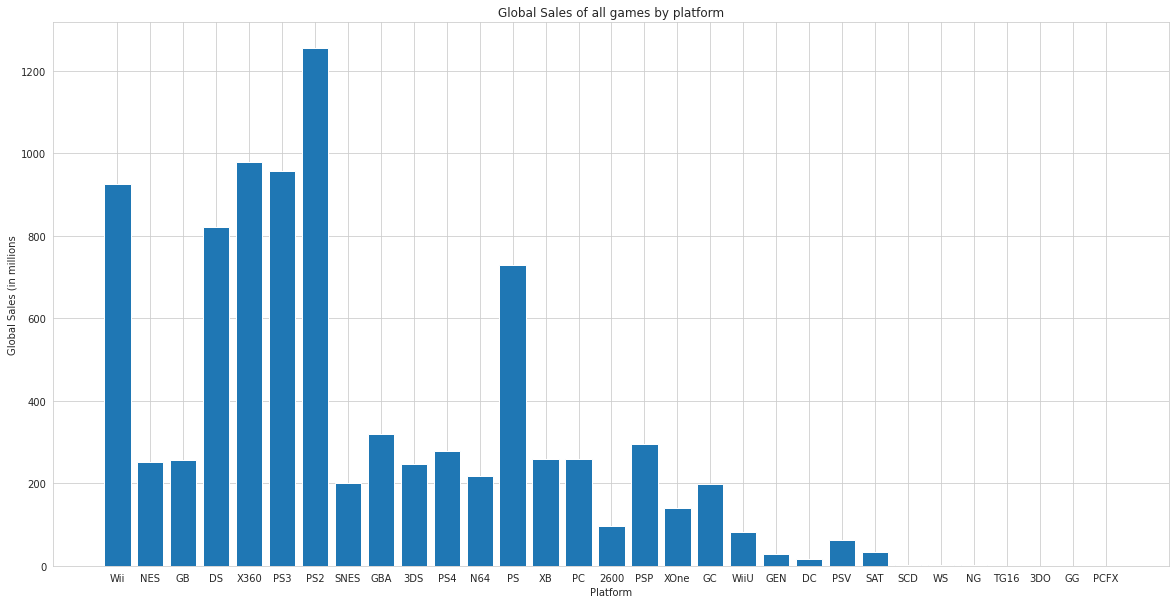

In [28]:
Platforms = pd.unique(sales['Platform'])
TotalSales = []

for x in Platforms:
  TotalSales.append(sales[sales['Platform'] == x]['Global_Sales'].sum())

plt.figure(figsize=(20,10))
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions')
plt.title('Global Sales of all games by platform')
plt.bar(Platforms, TotalSales)
plt.show()

## Search for video game (by name)
Enter a search term in the field and press 'Enter'

(All video games including that search term will be returned) 

In [29]:
import ipywidgets as widgets
from IPython.display import clear_output

name_search = widgets.Text(
    placeholder='Search for a game:',
    disabled=False
)
display(name_search) # Text input

def callback(wdgt):
    val = wdgt.value
    clear_output(wait=True) # Clear previous output (if any)
    display(name_search) # Show text input again
    display(sales[sales['Name'].str.contains(val)])

name_search.on_submit(callback)

Text(value='', placeholder='Search for a game:')

## Platform Sales - Region Distribution
Select a platform from the dropdown list

(A pie chart showing the regional distirbution of sales for the chosen platform will be displayed) 

Dropdown(index=16, options=('Choose a platform:', 'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA…

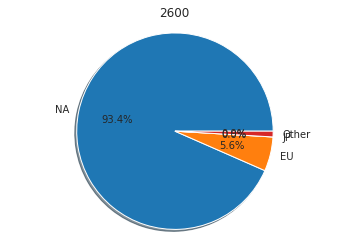

In [35]:
import numpy as np

labels = 'NA', 'EU', 'JP', 'Other'
sizes = []
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

Platforms = np.append("Choose a platform:", pd.unique(sales['Platform']))

platform_picker = widgets.Dropdown(
    options = Platforms, 
    value = 'Choose a platform:',
    disabled = False,
)

def on_change(change): # When dropdown value is changed
    if change['type'] == 'change' and change['name'] == 'value':
        val = change['new'] # Get changed value

        if val != 'Choose a platform:':
          sizes = [] # Reset this array
          clear_output(wait=True) # Clear previous output (if any)
          display(platform_picker) # Show text input again

          Total_Sales = sales[sales['Platform'] == val]['Global_Sales'].sum()

          NA_Sales = sales[sales['Platform'] == val]['NA_Sales'].sum()
          sizes.append((NA_Sales/Total_Sales)*100) # Percentage of Total Sales that are NA Sales

          EU_Sales = sales[sales['Platform'] == val]['EU_Sales'].sum()
          sizes.append((EU_Sales/Total_Sales)*100)

          JP_Sales = sales[sales['Platform'] == val]['JP_Sales'].sum()
          sizes.append((JP_Sales/Total_Sales)*100)

          Other_Sales = sales[sales['Platform'] == val]['Other_Sales'].sum()
          sizes.append((Other_Sales/Total_Sales)*100)

          # Plot
          plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
          plt.axis('equal')
          plt.title(val)
          plt.show()

platform_picker.observe(on_change)
display(platform_picker)

## Top 10 Best Selling Games (Platform)

Dropdown(index=16, options=('Choose a platform:', 'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA…

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
42,43,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
53,54,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
73,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
188,189,Tomodachi Life,3DS,2013.0,Simulation,Nintendo,0.96,2.02,1.89,0.28,5.15
234,235,Luigi's Mansion: Dark Moon,3DS,2013.0,Action,Nintendo,1.78,1.39,1.10,0.30,4.58
268,269,The Legend of Zelda: Ocarina of Time,3DS,2011.0,Action,Nintendo,2.03,1.27,0.62,0.30,4.21


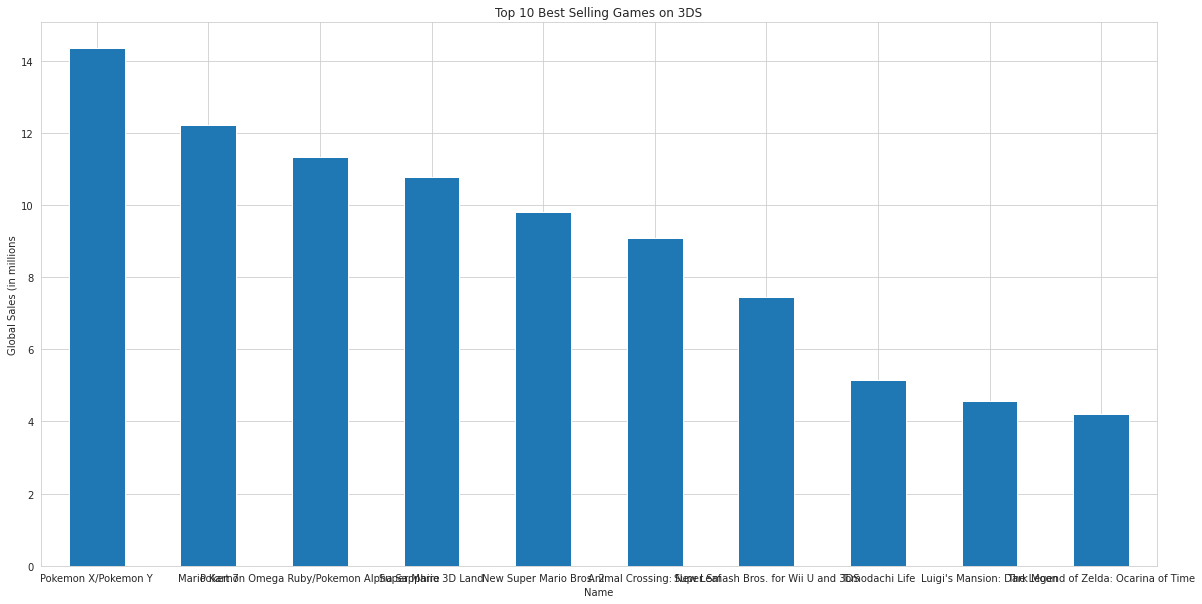

In [31]:
display(platform_picker)

def on_change_platform(change): # When dropdown value is changed
    if change['type'] == 'change' and change['name'] == 'value':
        val = change['new'] # Get changed value

        if val != 'Choose a platform:':
          num_rows = 0
          clear_output(wait=True) # Clear previous output (if any)
          display(platform_picker) # Show text input again

          sales_filter_platform = sales[sales['Platform'] == val].nlargest(10, 'Global_Sales')
          num_rows = sales_filter_platform.shape[0] # Number of rows in filtered dataset

          if num_rows > 0: # At least one row for that year
            display(sales_filter_platform)

            bar_title = "Top 10 Best Selling Games on " + str(val)
            x_width = num_rows * 2 # Chnage graph width based on number of rows (0-10 rows possible)

            ax_platform = sales_filter_platform.plot(x='Name', y='Global_Sales', kind='bar', title = bar_title, legend=False, figsize=(x_width, 10))

            ax_platform.set_xlabel('Name')
            ax_platform.tick_params(axis='x', labelrotation=0) # Horizontal bar labels for x axis
            ax_platform.set_ylabel('Global Sales (in millions')
            ax_platform.plot()
          else:
            print("No games for that platform")

platform_picker.observe(on_change_platform)

## Top 10 Best Selling Games (Year)

Dropdown(index=18, options=('Choose a year:', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990…

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
84,85,GoldenEye 007,N64,1997.0,Shooter,Nintendo,5.80,2.01,0.13,0.15,8.09
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
178,179,Tomb Raider II,PS,1997.0,Action,Eidos Interactive,2.30,2.46,0.20,0.28,5.24
213,214,Diddy Kong Racing,N64,1997.0,Racing,Nintendo,2.91,0.99,0.89,0.10,4.88
278,279,Frogger,PS,1997.0,Action,Hasbro Interactive,3.79,0.27,0.00,0.11,4.16
281,282,Half-Life,PC,1997.0,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12
296,297,Star Fox 64,N64,1997.0,Shooter,Nintendo,2.78,0.58,0.64,0.04,4.03
359,360,Croc: Legend of the Gobbos,PS,1997.0,Platform,Fox Interactive,1.57,1.79,0.00,0.20,3.56


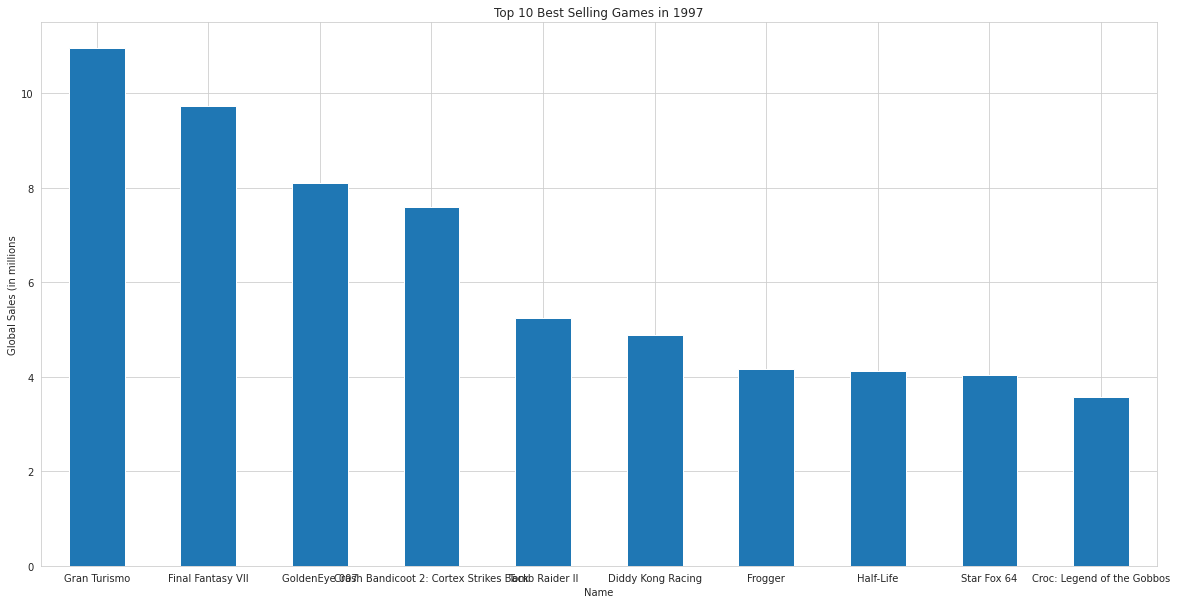

In [32]:
Years = ["Choose a year:"]
for x in range (1980, 2021): # Change to use minimum and maximum values of dataset not hardcoded values
  Years.append(x)

year_picker = widgets.Dropdown(
    options = Years,
    value = "Choose a year:", 
    disabled = False,
)

def on_change_year(change):
    if change['type'] == 'change' and change['name'] == 'value':
        val = change['new']

        if val != 'Choose a year:':
          num_rows = 0
          clear_output(wait=True)
          display(year_picker)

          sales_filter_year = sales[sales['Year'] == val].nlargest(10, 'Global_Sales')
          num_rows = sales_filter_year.shape[0] # Number of rows in filtered dataset

          if num_rows > 0: # At least one row for that year
            display(sales_filter_year)

            bar_title = "Top 10 Best Selling Games in " + str(val)
            x_width = num_rows * 2 # Chnage graph width based on number of rows (0-10 rows possible)

            ax = sales_filter_year.plot(x='Name', y='Global_Sales', kind='bar', title = bar_title, legend=False, figsize=(x_width, 10))

            ax.set_xlabel('Name')
            ax.tick_params(axis='x', labelrotation=0) # Horizontal bar labels for x axis
            ax.set_ylabel('Global Sales (in millions')
            ax.plot()
          else:
            print("No games for that year")

year_picker.observe(on_change_year)
display(year_picker)

## Platform Genre Sales